In [1]:
import qiskit

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

from qiskit import BasicAer
from qiskit.ml.datasets import ad_hoc_data
from qiskit.aqua import QuantumInstance
from qiskit.aqua.algorithms import QSVM
from qiskit.circuit.library import ZZFeatureMap
from qiskit.aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name

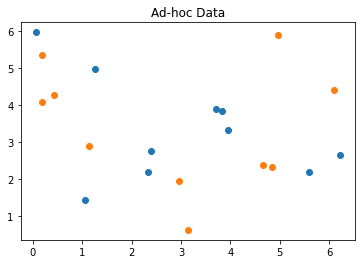

{'A': 0, 'B': 1}


In [3]:
feature_dim = 2
training_dataset_size = 10
testing_dataset_size = 20
random_seed = 10598
shot = 10000
sampel_total, training_input, test_input, class_labels = ad_hoc_data(training_size = training_dataset_size, 
                                                         test_size = testing_dataset_size,
                                                         gap = 0.2, 
                                                         n= feature_dim,
                                                         plot_data = True)

datapoints, class_to_label = split_dataset_to_data_and_labels(test_input)
print(class_to_label)

In [5]:
backend = BasicAer.get_backend('qasm_simulator')
feature_map = ZZFeatureMap(feature_dim, reps =2)
qsvm = QSVM(feature_map, training_input, test_input, None) 
qsvm.random_seed = random_seed
quantum_instance = QuantumInstance(backend, shots=1000, seed_simulator =random_seed, seed_transpiler =random_seed)
result = qsvm.run(quantum_instance)

kernel matrix during the training


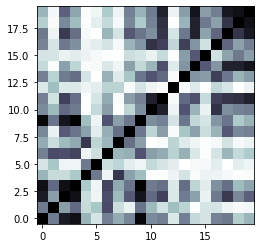

In [6]:
print("kernel matrix during the training")
kernel_matrix = result['kernel_matrix_training']
img = plt.imshow(np.asmatrix(kernel_matrix), interpolation= 'nearest', origin ='lower', cmap= 'bone_r')
plt.show()

In [9]:
predicted_labels = qsvm.predict(datapoints[0])
predicted_classes = map_label_to_class_name(predicted_labels, qsvm.label_to_class)
print("Ground_truth {}".format(datapoints[1]))
print("prediction {}".format(predicted_labels))

print("testing success_ratio:", result['testing_accuracy'])

Ground_truth [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]
prediction [1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1
 0 1 1]
testing success_ratio: 0.825
